In [603]:
import l

UPRO 2015-01-01 2023-01-01


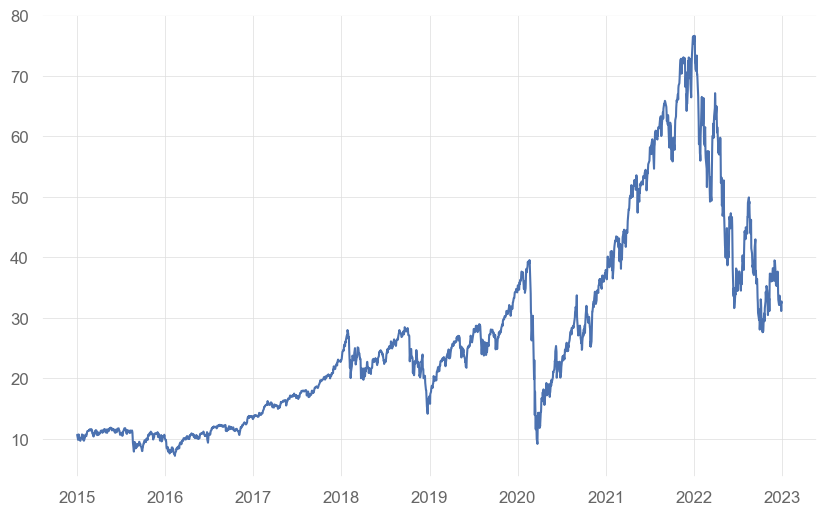

In [496]:
import matplotlib.pyplot as plt

security_name = 'UPRO'
start_date = '2015-01-01'
end_date = '2023-01-01'

mystrategy = l.Strategy(security_name, start_date, end_date)
print(mystrategy.security_name, mystrategy.start, mystrategy.end)

result = mystrategy.download_data()
mypsar = mystrategy.get_psar(result)
plt.plot(result.index, result.Close, label='Close')


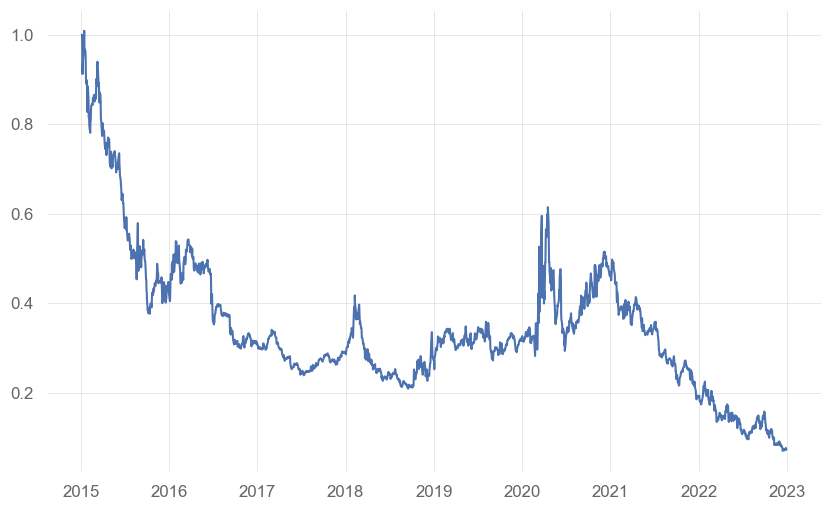

In [497]:
signal = mystrategy.get_signals(result,  mypsar)
result["Signal"] = signal

result = mystrategy.get_equity_curve(result)
plt.plot(result['Cumulative Returns'])


In [498]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [499]:
result

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Signal,Daily Returns,Cumulative Returns,Benchmark
Date,,,,,,,,,,,,
2015-01-02 00:00:00-05:00,10.834048,10.909906,10.485422,10.672647,19633200,0.0,0.0,0.0,0,NaN,NaN,100.000000
2015-01-05 00:00:00-05:00,10.480581,10.515281,10.043991,10.098060,30900000,0.0,0.0,0.0,0,-0.000000,1.000000,94.616266
2015-01-06 00:00:00-05:00,10.156165,10.248970,9.674382,9.824486,35046000,0.0,0.0,0.0,-1,-0.000000,1.000000,92.052948
2015-01-07 00:00:00-05:00,10.056900,10.240897,9.969743,10.186828,21228000,0.0,0.0,0.0,-1,-0.036882,0.963118,95.448000
2015-01-08 00:00:00-05:00,10.441035,10.761417,10.437000,10.724295,27528000,0.0,0.0,0.0,-1,-0.052761,0.912303,100.483930
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,31.896204,32.748620,31.489820,32.689148,12097000,0.0,0.0,0.0,-1,-0.015082,0.072535,306.289053
2022-12-27 00:00:00-05:00,32.689150,32.768447,31.866472,32.322414,8897400,0.0,0.0,0.0,-1,0.011219,0.073349,302.852852
2022-12-28 00:00:00-05:00,32.302587,32.808087,31.053698,31.113169,11445900,0.0,0.0,0.0,-1,0.037412,0.076093,291.522526


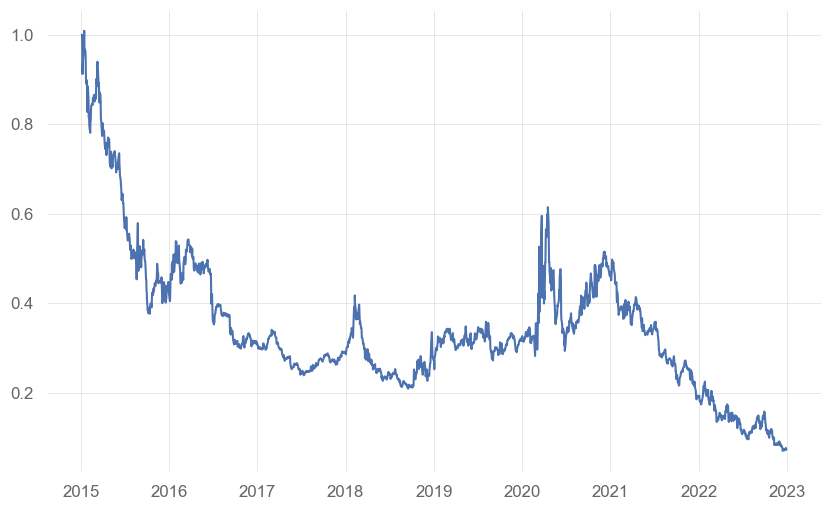

In [500]:
import matplotlib.pyplot as plt

#plt.plot(l.result['Benchmark'])
plt.plot(result['Cumulative Returns'])



In [501]:
import quantstats as qs

qs.reports.html(result['Cumulative Returns'], output= "report_strategy.html")

In [14]:
import webbrowser

webbrowser.open_new_tab("report_strategy.html")

True

In [15]:
!open report_strategy.html

The application cannot be opened for an unexpected reason, error=Error Domain=NSOSStatusErrorDomain Code=-600 "procNotFound: no eligible process with specified descriptor" UserInfo={_LSLine=387, _LSFunction=_LSAnnotateAndSendAppleEventWithOptions}


In [18]:
import pandas as pd
d= result.groupby(pd.Grouper(freq='M')).size()
#start_date = d.index[0]-pd.offsets.MonthBegin()#pd.DateOffset("M")

#d.add(start_date)
#d.resample("D").bfill()
#d
periods = pd.to_datetime(d.index).to_period('M')
pd.Series(d.values, periods).to_frame()
result

/var/folders/ht/4gz2x46d0hz9qprz3nbv3p900000gn/T/ipykernel_45207/2695725559.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  periods = pd.to_datetime(d.index).to_period('M')


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Signal,Daily Returns,Cumulative Returns,Benchmark
Date,,,,,,,,,,,,
2015-01-02 00:00:00-05:00,15.562255,15.642907,15.236035,15.425026,21171200,0.0,0.0,0.0,0,NaN,NaN,100.000000
2015-01-05 00:00:00-05:00,15.234830,15.262517,14.812310,14.862867,45052800,0.0,0.0,0.0,0,-0.000000,1.000000,96.355542
2015-01-06 00:00:00-05:00,14.923057,15.013340,14.443959,14.595634,58580800,0.0,0.0,0.0,-1,-0.000000,1.000000,94.623073
2015-01-07 00:00:00-05:00,14.824349,15.008525,14.742493,14.959170,30749600,0.0,0.0,0.0,-1,-0.024907,0.975093,96.979872
2015-01-08 00:00:00-05:00,15.197516,15.515309,15.197516,15.485215,29434400,0.0,0.0,0.0,-1,-0.035165,0.940803,100.390205
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,43.830555,44.599162,43.451241,44.569218,5069600,0.0,0.0,0.0,-1,-0.011096,0.296695,288.940958
2022-12-27 00:00:00-05:00,44.539271,44.619128,43.810593,44.199886,2516300,0.0,0.0,0.0,-1,0.008287,0.299154,286.546593
2022-12-28 00:00:00-05:00,44.189907,44.649074,43.051970,43.101879,4785900,0.0,0.0,0.0,-1,0.024842,0.306585,279.428244


In [20]:

result["trading_days_in_month"] = result.groupby(pd.Grouper(freq='M')).transform("size")
result["trading_days_in_month"]
result["constant"] =1
result["trading_day_of_month"] = result.groupby(pd.Grouper(freq='M'))[["constant"]].transform("cumsum")
result["trading_days_til_month_end"] = result["trading_days_in_month"] - result["trading_day_of_month"]
result["trading_days_til_month_end"]

Date
2015-01-02 00:00:00-05:00    19
2015-01-05 00:00:00-05:00    18
2015-01-06 00:00:00-05:00    17
2015-01-07 00:00:00-05:00    16
2015-01-08 00:00:00-05:00    15
                             ..
2022-12-23 00:00:00-05:00     4
2022-12-27 00:00:00-05:00     3
2022-12-28 00:00:00-05:00     2
2022-12-29 00:00:00-05:00     1
2022-12-30 00:00:00-05:00     0
Name: trading_days_til_month_end, Length: 2014, dtype: int64

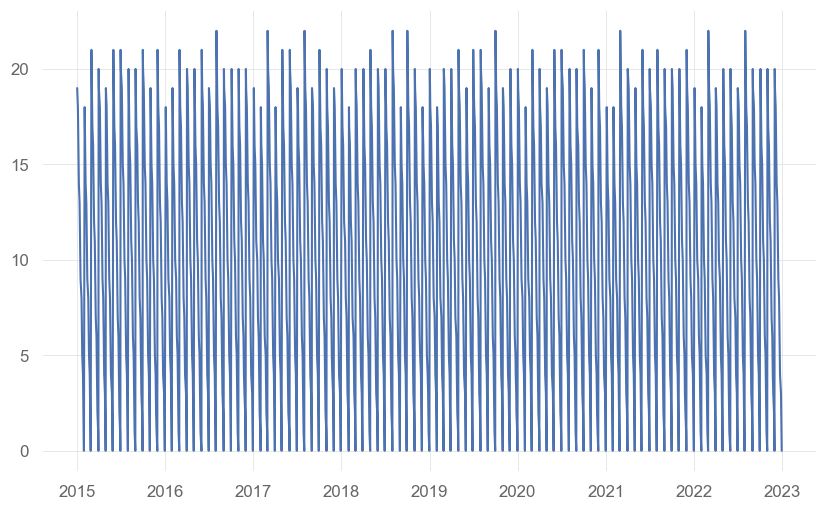

In [21]:
plt.plot(result['trading_days_til_month_end'])


In [22]:
import numpy as np
signal = np.where(result['trading_days_til_month_end'] <= 4, 1, np.where(result['trading_day_of_month'] <= 2, 1, 0))


In [23]:
result['My Indicator'] = signal



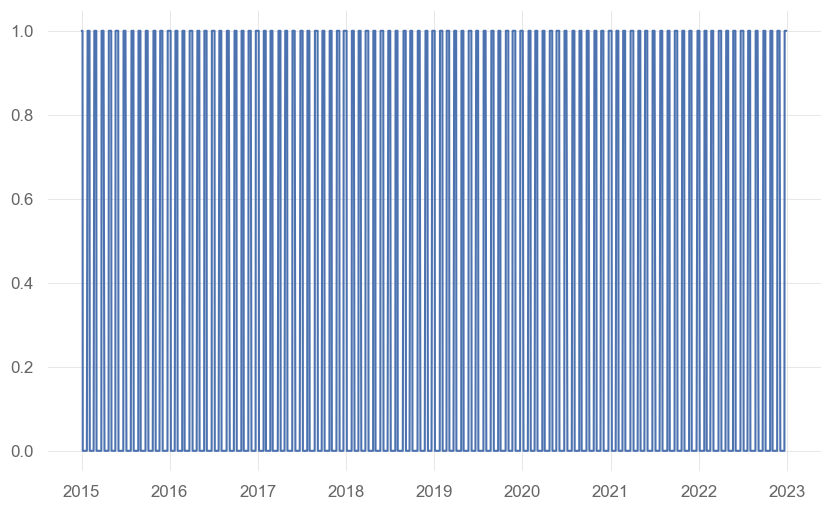

In [24]:
plt.plot(result['My Indicator'])



In [25]:
signals = mystrategy.get_signals(result, result['My Indicator'])



In [26]:
#signal = np.where(indicator == 1, , np.where(data.Close < indicator, -1, 0))
result['Signal'] = signal




In [28]:
mystrategy.get_equity_curve2(result)



,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Signal,Daily Returns,Cumulative Returns,Benchmark,trading_days_in_month,constant,trading_day_of_month,trading_days_til_month_end,My Indicator
Date,,,,,,,,,,,,,,,,,
2015-01-02 00:00:00-05:00,15.562255,15.642907,15.236035,15.425026,21171200,0.0,0.0,0.0,1,NaN,NaN,100.000000,20,1,1,19,1
2015-01-05 00:00:00-05:00,15.234830,15.262517,14.812310,14.862867,45052800,0.0,0.0,0.0,1,-0.036445,0.963555,96.355542,20,1,2,18,1
2015-01-06 00:00:00-05:00,14.923057,15.013340,14.443959,14.595634,58580800,0.0,0.0,0.0,0,-0.000000,0.963555,94.623073,20,1,3,17,0
2015-01-07 00:00:00-05:00,14.824349,15.008525,14.742493,14.959170,30749600,0.0,0.0,0.0,0,0.000000,0.963555,96.979872,20,1,4,16,0
2015-01-08 00:00:00-05:00,15.197516,15.515309,15.197516,15.485215,29434400,0.0,0.0,0.0,0,0.000000,0.963555,100.390205,20,1,5,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,43.830555,44.599162,43.451241,44.569218,5069600,0.0,0.0,0.0,1,0.011096,2.038211,288.940958,21,1,17,4,1
2022-12-27 00:00:00-05:00,44.539271,44.619128,43.810593,44.199886,2516300,0.0,0.0,0.0,1,-0.008287,2.021321,286.546593,21,1,18,3,1
2022-12-28 00:00:00-05:00,44.189907,44.649074,43.051970,43.101879,4785900,0.0,0.0,0.0,1,-0.024842,1.971108,279.428244,21,1,19,2,1


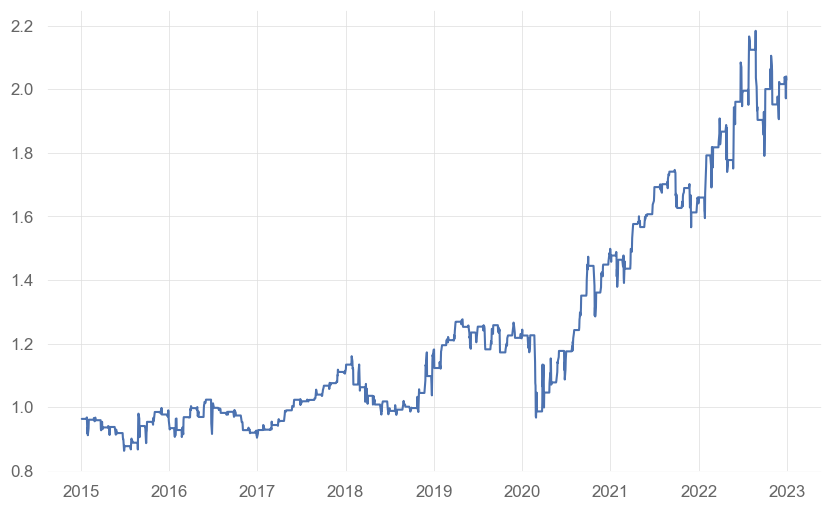

In [29]:
plt.plot(result['Cumulative Returns'])


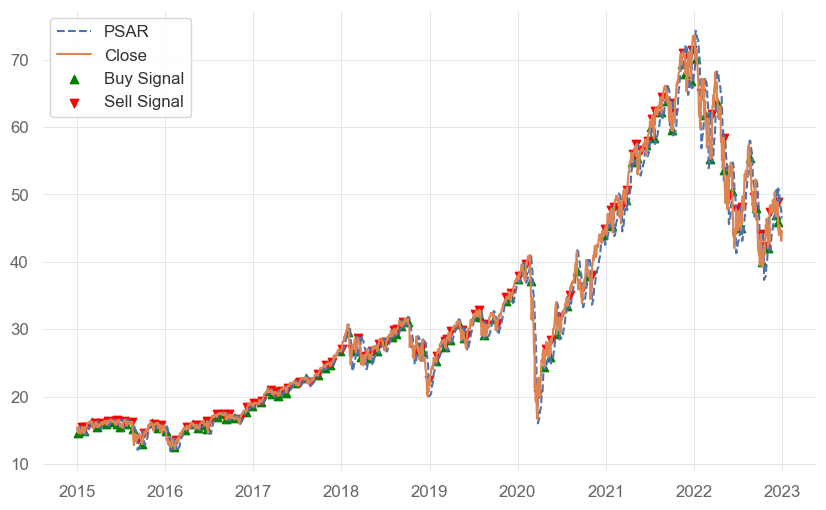

In [30]:
plt.plot(mypsar.index, mypsar.values, label='PSAR',linestyle='--' )
plt.plot(result.index, result.Close, label='Close')
# Find crossover points
cross_above = (mypsar > result.Close) & (mypsar.shift(1) <= result.Close.shift(1))
cross_below = (mypsar < result.Close) & (mypsar.shift(1) >= result.Close.shift(1))
# Plot green arrows for upward crossovers
plt.scatter(result.index[cross_above], result.Close[cross_above], marker='^', color='green', label='Buy Signal')
plt.scatter(result.index[cross_below], result.Close[cross_below], marker='v', color='red', label='Sell Signal')
plt.grid(True)
plt.legend()
plt.show()


In [32]:
result["trading_day_of_year"]=result.groupby(pd.Grouper(freq='Y'))[['constant']].cumsum()

In [33]:
result["trading_day_of_year"][152:]

Date
2015-08-11 00:00:00-04:00    153
2015-08-12 00:00:00-04:00    154
2015-08-13 00:00:00-04:00    155
2015-08-14 00:00:00-04:00    156
2015-08-17 00:00:00-04:00    157
                            ... 
2022-12-23 00:00:00-05:00    247
2022-12-27 00:00:00-05:00    248
2022-12-28 00:00:00-05:00    249
2022-12-29 00:00:00-05:00    250
2022-12-30 00:00:00-05:00    251
Name: trading_day_of_year, Length: 1862, dtype: int64

In [34]:
pick_dates = ((result["trading_day_of_year"] >= 50) & (result["trading_day_of_year"] <= 84)) | ((result["trading_day_of_year"] >= 93) & (result["trading_day_of_year"] <= 153)) | ((result["trading_day_of_year"] >= 188) & (result["trading_day_of_year"] <= 251))




In [35]:
signal = np.where(pick_dates== True, 1, 0)


In [36]:
signal

array([0, 0, 0, ..., 1, 1, 1])

In [41]:
result['Signal'] = signal
mystrategy.get_equity_curve2(result)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Signal,Daily Returns,Cumulative Returns,Benchmark,trading_days_in_month,constant,trading_day_of_month,trading_days_til_month_end,My Indicator,trading_day_of_year
Date,,,,,,,,,,,,,,,,,,
2015-01-02 00:00:00-05:00,15.562255,15.642907,15.236035,15.425026,21171200,0.0,0.0,0.0,0,NaN,NaN,100.000000,20,1,1,19,1,1
2015-01-05 00:00:00-05:00,15.234830,15.262517,14.812310,14.862867,45052800,0.0,0.0,0.0,0,-0.000000,1.000000,96.355542,20,1,2,18,1,2
2015-01-06 00:00:00-05:00,14.923057,15.013340,14.443959,14.595634,58580800,0.0,0.0,0.0,0,-0.000000,1.000000,94.623073,20,1,3,17,0,3
2015-01-07 00:00:00-05:00,14.824349,15.008525,14.742493,14.959170,30749600,0.0,0.0,0.0,0,0.000000,1.000000,96.979872,20,1,4,16,0,4
2015-01-08 00:00:00-05:00,15.197516,15.515309,15.197516,15.485215,29434400,0.0,0.0,0.0,0,0.000000,1.000000,100.390205,20,1,5,15,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,43.830555,44.599162,43.451241,44.569218,5069600,0.0,0.0,0.0,1,0.011096,6.849900,288.940958,21,1,17,4,1,247
2022-12-27 00:00:00-05:00,44.539271,44.619128,43.810593,44.199886,2516300,0.0,0.0,0.0,1,-0.008287,6.793137,286.546593,21,1,18,3,1,248
2022-12-28 00:00:00-05:00,44.189907,44.649074,43.051970,43.101879,4785900,0.0,0.0,0.0,1,-0.024842,6.624383,279.428244,21,1,19,2,1,249


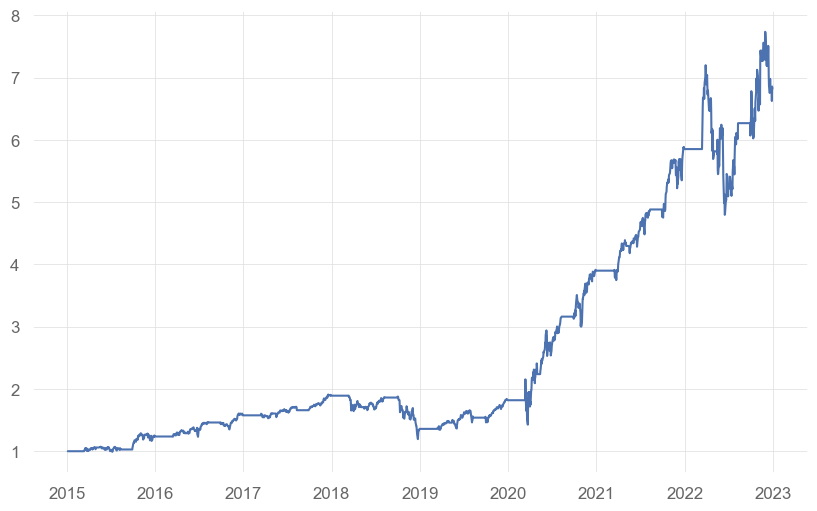

In [42]:
plt.plot(result['Cumulative Returns'])


SPY 2015-01-01 2024-01-01


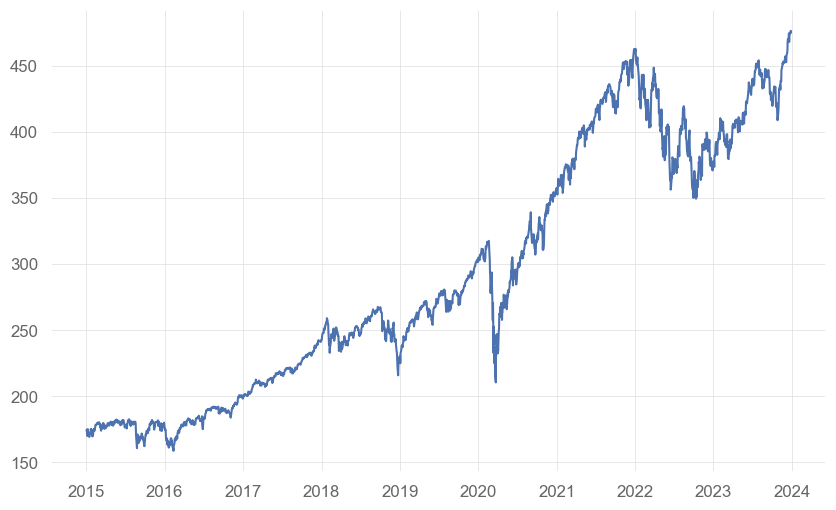

In [504]:
import matplotlib.pyplot as plt

import l

#security_name = 'UPRO'
#security_name = 'SSO'
security_name = 'SPY'
#security_name = 'GLD'
#security_name = 'QQQ'
#security_name = 'VIOO'
#security_name = 'FNGS'
start_date = '2015-01-01'
end_date = '2024-01-01'

mystrategy = l.OtherStrategy(security_name, start_date, end_date)
print(mystrategy.security_name, mystrategy.start, mystrategy.end)

result = mystrategy.download_data()
#mypsar = mystrategy.get_psar(result)
plt.plot(result.index, result.Close, label='Close')

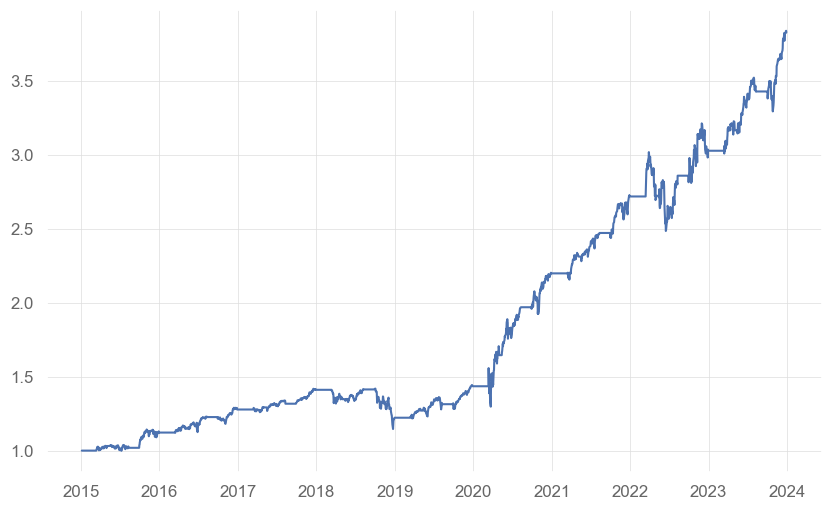

In [505]:
result = mystrategy.run()
import quantstats as qs

qs.reports.html(result['Cumulative Returns'], output= "report_strategy.html")

SPY 1994-01-01 2024-01-01


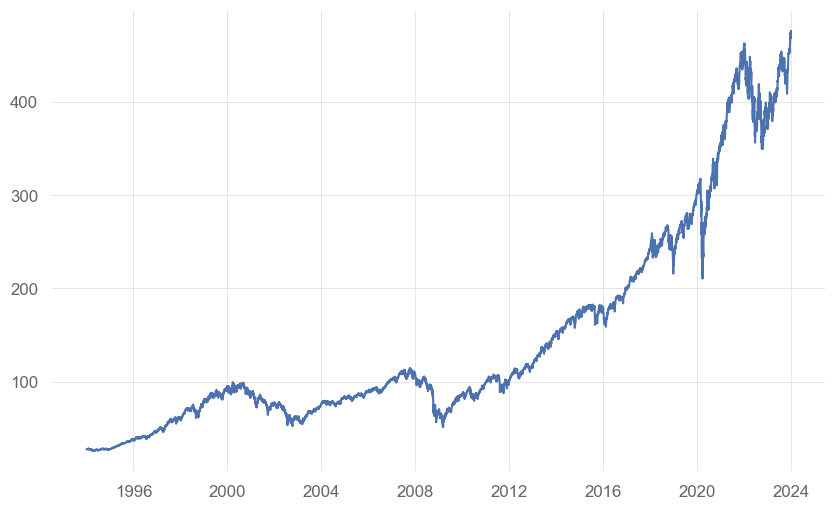

In [729]:
import matplotlib.pyplot as plt

import l

#security_name = 'UPRO'
#security_name = 'SSO'
#security_name = 'QQQ'
security_name = 'SPY'
#security_name = 'GLD'
#security_name = 'XLP'
#security_name = 'IWM'
#security_name = 'USO'
#start_date = '2020-01-01'
start_date = '1994-01-01'
end_date = '2024-01-01'

mystrategy = l.TurnOfMonthStrategy(security_name, start_date, end_date)
print(mystrategy.security_name, mystrategy.start, mystrategy.end)

result = mystrategy.download_data()
#mypsar = mystrategy.get_psar(result)
plt.plot(result.index, result.Close, label='Close')

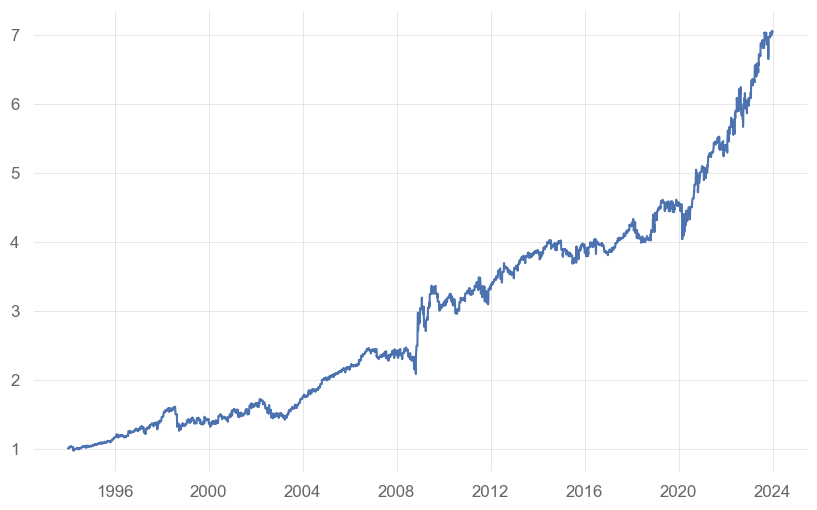

In [730]:
mystrategy.run()

In [731]:
result = mystrategy.download_data()
result['Year'] = result.index.year
result['Month'] = result.index.month
result['Day'] = result.index.day

result

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Year,Month,Day
Date,,,,,,,,,,,
1994-01-03 00:00:00-05:00,27.004105,27.040328,26.895437,26.931660,960900,0.0,0.0,0.0,1994,1,3
1994-01-04 00:00:00-05:00,26.967878,27.040323,26.931655,27.040323,164300,0.0,0.0,0.0,1994,1,4
1994-01-05 00:00:00-05:00,27.076548,27.112771,26.967880,27.094660,710900,0.0,0.0,0.0,1994,1,5
1994-01-06 00:00:00-05:00,27.130883,27.148994,27.058437,27.094660,201000,0.0,0.0,0.0,1994,1,6
1994-01-07 00:00:00-05:00,27.148988,27.275767,27.076542,27.257656,775500,0.0,0.0,0.0,1994,1,7
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,473.859985,475.380005,471.700012,473.649994,67126600,0.0,0.0,0.0,2023,12,22
2023-12-26 00:00:00-05:00,474.070007,476.579987,473.989990,475.649994,55387000,0.0,0.0,0.0,2023,12,26
2023-12-27 00:00:00-05:00,475.440002,476.660004,474.890015,476.510010,68000300,0.0,0.0,0.0,2023,12,27


In [732]:
import pandas as pd
#    piv = pd.pivot_table(df, index=piv_index, columns=piv_season, values=[column])

piv = pd.pivot_table(result,index=['Month','Day'], columns='Year', values=['Close']).bfill().ffill()
piv

Close                                                         \
Year            1994       1995       1996       1997       1998       1999   
Month Day                                                                     
1     2    26.931660  27.241547  37.826454  45.963497  61.509705  78.573036   
      3    26.931660  27.241547  37.931076  46.623184  61.647652  78.573036   
      4    27.040323  27.371708  37.569664  46.215752  61.647652  78.573036   
      5    27.094660  27.371708  37.493557  46.215752  61.647652  79.471169   
      6    27.094660  27.399620  37.636230  46.215752  60.662556  81.387085   
...              ...        ...        ...        ...        ...        ...   
12    27   27.557657  37.417477  47.108238  60.288177  78.153969  94.426559   
      28   27.418203  37.379429  46.700802  60.288177  78.153969  94.366058   
      29   27.436792  37.426983  46.700802  60.288177  79.391365  94.769539   
      30   27.111382  37.426983  46.700802  61.233910  78.752670  94.658554   
      31   27.111382  37.426983  45.847111  61.194481  78.752670  94.809837   

                                                       ...              \
Year            2000       2001       2002       2003  ...        2014   
Month Day                                              ...               
1     2    93.881905  84.024727  76.324326  61.118767  ...  152.669159   
      3    93.881905  88.060829  77.189758  61.306671  ...  152.644089   
      4    90.210571  87.112968  77.705055  62.387165  ...  152.201767   
      5    90.371925  84.269341  77.156685  62.387165  ...  152.201767   
      6    88.919525  84.921661  77.156685  62.387165  ...  152.201767   
...              ...        ...        ...        ...  ...         ...   
12    27   86.960075  76.674423  58.642311  75.818039  ...  177.606323   
      28   87.225105  76.634827  59.132248  75.818039  ...  177.606323   
      29   85.573967  75.511719  59.132248  75.818039  ...  177.606323   
      30   85.573967  75.511719  59.132248  75.831673  ...  176.653305   
      31   85.573967  75.511719  59.212788  75.899872  ...  174.900375   

                                                                       \
Year             2015        2016        2017        2018        2019   
Month Day                                                               
1     2    174.806778  174.583984  199.819550  243.072281  230.557434   
      3    171.649872  174.583984  199.819550  244.609711  225.055679   
      4    171.649872  174.583984  201.008301  245.640717  232.594101   
      5    171.649872  174.879242  200.848602  247.277786  234.428040   
      6    170.033035  172.673279  201.567200  247.729935  234.428040   
...               ...         ...         ...         ...         ...   
12    27   178.222961  200.733307  241.760956  228.612961  303.170959   
      28   178.222961  199.074341  242.258270  228.318054  301.499542   
      29   180.124908  199.029984  241.344894  230.317856  301.499542   
      30   178.848236  198.302505  241.344894  230.317856  301.499542   
      31   177.059128  198.302505  241.344894  230.317856  302.231995   

                                                           
Year             2020        2021        2022        2023  
Month Day                                                  
1     2    305.058380  352.767212  463.045990  375.118713  
      3    302.748413  352.767212  463.045990  375.118713  
      4    303.903473  352.767212  462.890900  378.014740  
      5    303.903473  355.196777  454.002441  373.700256  
      6    303.903473  357.320282  453.575897  382.269989  
...               ...         ...         ...         ...  
12    27   356.000305  462.609802  375.690033  476.510010  
      28   356.000305  462.231781  371.020996  476.690002  
      29   355.321167  462.823059  377.699463  475.309998  
      30   355.828125  461.543549  376.704590  475.309998  
      31   357.636017  460.380402  376.704590  475.309998  

[363 ro

<Axes: xlabel='Month,Day'>

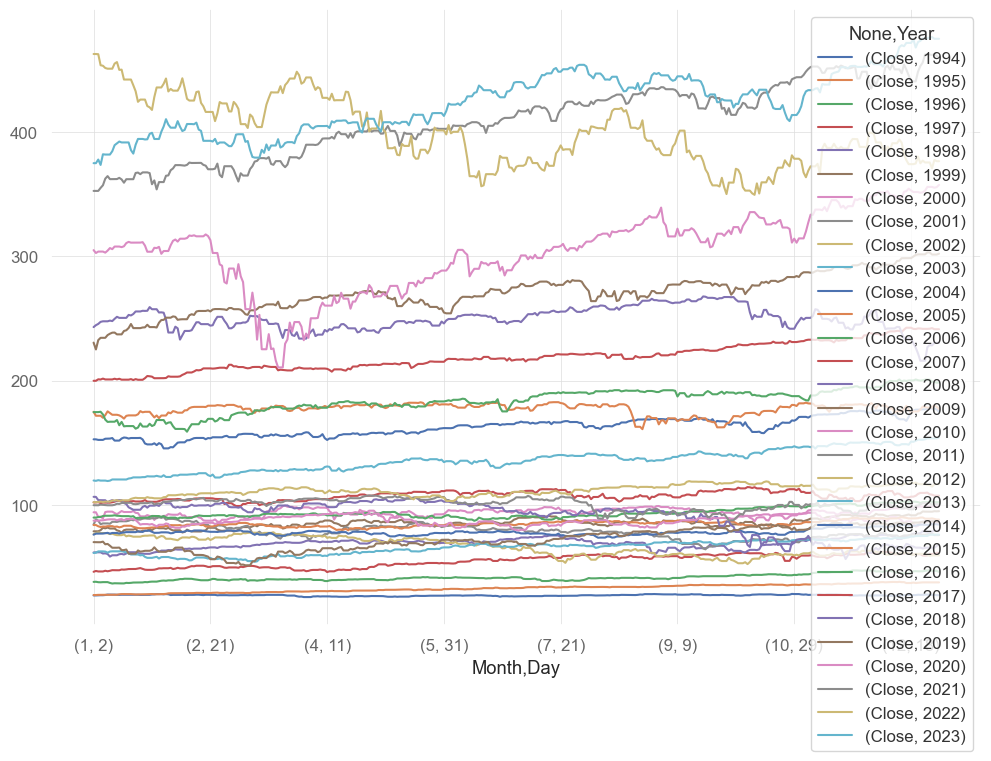

In [733]:
piv.plot(figsize=(12,8))

<Axes: xlabel='Month,Day'>

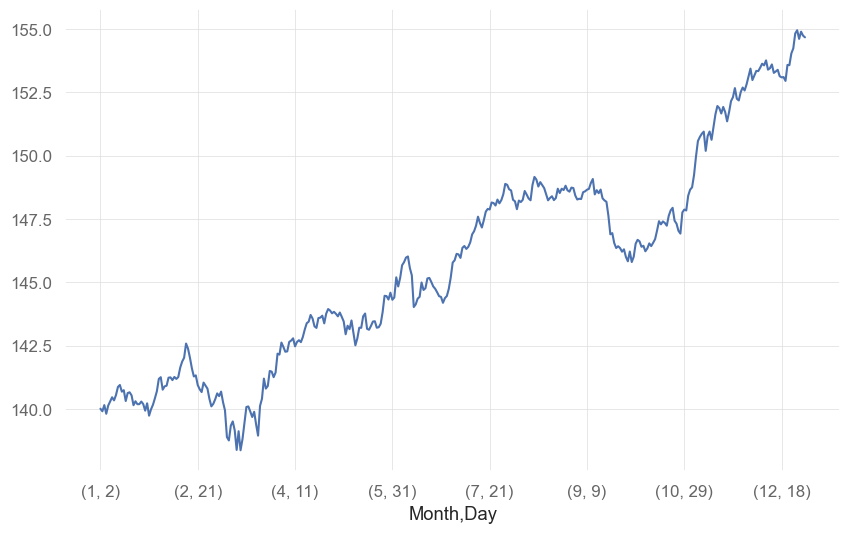

In [734]:
piv.iloc[:].mean(axis=1).plot()
#piv.plot()

In [735]:
result

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Year,Month,Day
Date,,,,,,,,,,,
1994-01-03 00:00:00-05:00,27.004105,27.040328,26.895437,26.931660,960900,0.0,0.0,0.0,1994,1,3
1994-01-04 00:00:00-05:00,26.967878,27.040323,26.931655,27.040323,164300,0.0,0.0,0.0,1994,1,4
1994-01-05 00:00:00-05:00,27.076548,27.112771,26.967880,27.094660,710900,0.0,0.0,0.0,1994,1,5
1994-01-06 00:00:00-05:00,27.130883,27.148994,27.058437,27.094660,201000,0.0,0.0,0.0,1994,1,6
1994-01-07 00:00:00-05:00,27.148988,27.275767,27.076542,27.257656,775500,0.0,0.0,0.0,1994,1,7
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,473.859985,475.380005,471.700012,473.649994,67126600,0.0,0.0,0.0,2023,12,22
2023-12-26 00:00:00-05:00,474.070007,476.579987,473.989990,475.649994,55387000,0.0,0.0,0.0,2023,12,26
2023-12-27 00:00:00-05:00,475.440002,476.660004,474.890015,476.510010,68000300,0.0,0.0,0.0,2023,12,27


In [736]:
result['Open']

Date
1994-01-03 00:00:00-05:00     27.004105
1994-01-04 00:00:00-05:00     26.967878
1994-01-05 00:00:00-05:00     27.076548
1994-01-06 00:00:00-05:00     27.130883
1994-01-07 00:00:00-05:00     27.148988
                                ...    
2023-12-22 00:00:00-05:00    473.859985
2023-12-26 00:00:00-05:00    474.070007
2023-12-27 00:00:00-05:00    475.440002
2023-12-28 00:00:00-05:00    476.880005
2023-12-29 00:00:00-05:00    476.489990
Name: Open, Length: 7552, dtype: float64

In [737]:
from ta.trend import SMAIndicator
from ta.momentum import RSIIndicator

<Axes: xlabel='Date'>

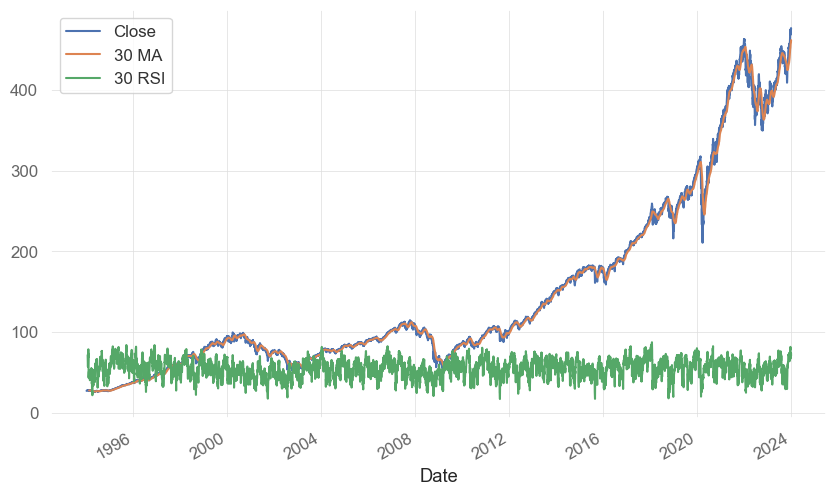

In [738]:
sma = SMAIndicator(result['Close'], window=30)
l = sma.sma_indicator()
result['30 MA'] = l
result['30 RSI'] = RSIIndicator(result['Close']).rsi()
result[['Close','30 MA','30 RSI']].plot()

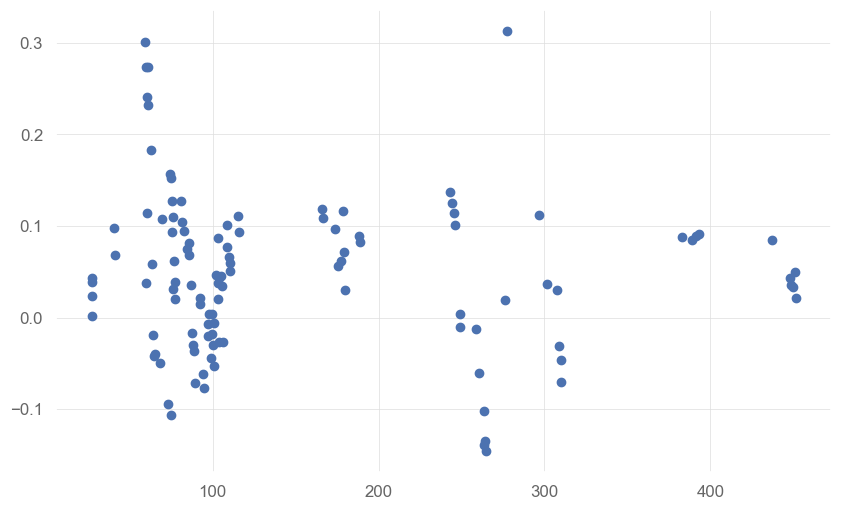

In [796]:
result['Daily Returns'] = result['Close'].pct_change()

#result[['30 RSI','Daily Returns']].corr()
#result
#result[['30 RSI','Daily Returns']].plot()
#filtered_df = result[result[['30 RSI', 'Daily Returns']].notnull().all(1)]
rolling_window_size = 50
result['Daily Window Returns'] = result['Daily Returns'].rolling(rolling_window_size).sum().shift(-(rolling_window_size-1))
fresult = result[result['30 RSI'] < 30]
plt.scatter(x=fresult['30 MA'].values, y=fresult['Daily Window Returns'].values)
#plt.scatter(x=filtered_df['30 RSI'].values, y=filtered_df['Daily Returns'].values)


In [478]:
import yfinance as yf
#data_all = yf.download('SPY')
#data_all = yf.download('AAPL')
data_all = yf.download('VTSI')
data_all

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-09-25,1.36,1.40,1.3600,1.400,1.400,4400
2012-09-26,1.40,1.40,1.3020,1.302,1.302,2270
2012-09-27,1.48,1.48,1.4200,1.460,1.460,2860
2012-09-28,1.46,1.46,1.4600,1.460,1.460,0
2012-10-01,1.32,1.32,1.3200,1.320,1.320,60
...,...,...,...,...,...,...
2024-01-12,11.71,11.90,11.2000,11.510,11.510,150600
2024-01-16,11.51,12.65,11.2705,12.250,12.250,471000
2024-01-17,12.30,12.41,11.6300,11.950,11.950,205800


In [479]:
#data = data_all.resample('M').last()
data = data_all
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-09-25,1.36,1.40,1.3600,1.400,1.400,4400
2012-09-26,1.40,1.40,1.3020,1.302,1.302,2270
2012-09-27,1.48,1.48,1.4200,1.460,1.460,2860
2012-09-28,1.46,1.46,1.4600,1.460,1.460,0
2012-10-01,1.32,1.32,1.3200,1.320,1.320,60
...,...,...,...,...,...,...
2024-01-12,11.71,11.90,11.2000,11.510,11.510,150600
2024-01-16,11.51,12.65,11.2705,12.250,12.250,471000
2024-01-17,12.30,12.41,11.6300,11.950,11.950,205800


In [480]:
!pip install pandas_ta


[notice] A new release of pip is available: 23.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [481]:
import pandas_ta as pta

data['rsi'] = pta.rsi(data['Close'], 4)
data['low'] = 0
n=18

In [482]:
data

,Open,High,Low,Close,Adj Close,Volume,rsi,low
Date,,,,,,,,
2012-09-25,1.36,1.40,1.3600,1.400,1.400,4400,NaN,0
2012-09-26,1.40,1.40,1.3020,1.302,1.302,2270,NaN,0
2012-09-27,1.48,1.48,1.4200,1.460,1.460,2860,NaN,0
2012-09-28,1.46,1.46,1.4600,1.460,1.460,0,NaN,0
2012-10-01,1.32,1.32,1.3200,1.320,1.320,60,32.890024,0
...,...,...,...,...,...,...,...,...
2024-01-12,11.71,11.90,11.2000,11.510,11.510,150600,63.165140,0
2024-01-16,11.51,12.65,11.2705,12.250,12.250,471000,79.977027,0
2024-01-17,12.30,12.41,11.6300,11.950,11.950,205800,64.150484,0


In [483]:
for i in range(n, len(data)):
    #print(i)
    if min(data['Close'][i-n:i]) > data['Close'][i]:
        data['low'][i] = 1

/var/folders/ht/4gz2x46d0hz9qprz3nbv3p900000gn/T/ipykernel_50680/2777224376.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['low'][i] = 1


In [484]:
data['signal'] = 0

In [485]:
for i in range(n, len(data)):
    if max(data['low'][i-n:i]) == 1 and data['rsi'][i] > 60 and max(data['signal'][i-n:i]) == 0:
        data['signal'][i] = 1

/var/folders/ht/4gz2x46d0hz9qprz3nbv3p900000gn/T/ipykernel_50680/191218257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['signal'][i] = 1


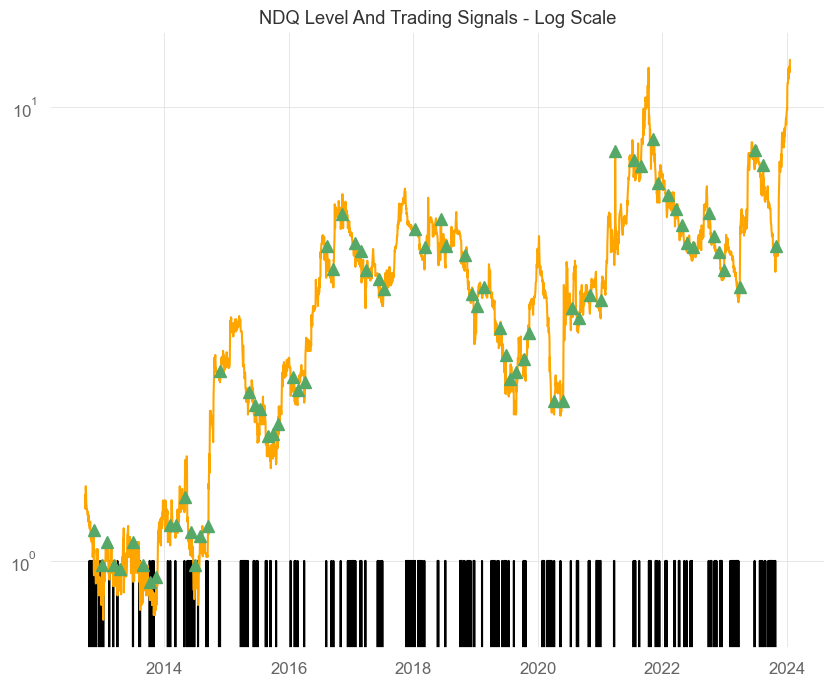

In [486]:
plt.figure(figsize=[10,8])
plt.plot(data['low'], label='Strategy', color='black')
plt.plot(data['Close'], label='Strategy', color='orange')
plt.plot(data['Close'][data['signal']==1], '^', markersize=9, color='g')
plt.yscale('log')
plt.title('NDQ Level And Trading Signals - Log Scale')
plt.show()

trades 1211 
wins 483 
win ratio 0.3988439306358382 
total_price_change -4.693303287029266 
total_percent_change 1.325787171046812 
average_percent_change 0.10947870941757326


<Axes: xlabel='Date'>

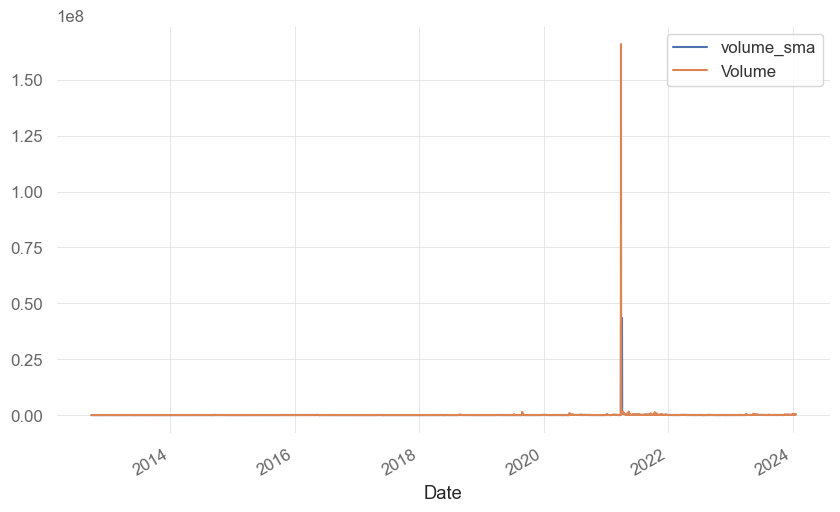

In [490]:
data['volume_sma'] = pta.sma(data["Volume"], length=4)

trades = 0
wins = 0
total_price_change = 0
total_percent_change = 0
for i in range(2, len(data)):
#    print(i)
    if (data['volume_sma'][i-1]) < data['Volume'][i-1]:
    #if data['volume_sma'][i-1] < data['Volume'][i-1] and data['Open'][i] < 1.009 * data['Open'][i-1]:
#    if data['Volume'][i-2] < data['Volume'][i-1] and 1.00 * data['Open'][i-2] < data['Open'][i-1]:
#    if 1.00 * data['Close'][i-2] < data['Close'][i-1]:

        #and data['Open'][i] > 1.00 * data['Open'][i-1]:
#    if True:
        trades+=1

#        price_change = data['Open'][i] - data['Close'][i]
        price_change = data['Close'][i-1] - data['Open'][i]
        if price_change > 0:
                wins+=1
        percent_change = price_change/data['Open'][i]
        total_price_change += price_change
        total_percent_change += percent_change

print(
    "trades", trades,
    "\nwins", wins,
    "\nwin ratio", wins/trades,
    "\ntotal_price_change", total_price_change,
    "\ntotal_percent_change", total_percent_change,
    "\naverage_percent_change", (total_percent_change/trades) * 100
)
data[['volume_sma','Volume']].plot()

In [491]:
qs.reports

<module 'quantstats.reports' from '/Users/ja/.pyenv/versions/3.10.6/lib/python3.10/site-packages/quantstats/reports.py'>

In [506]:
qs.stats.exposure(result['Cumulative Returns']) # time in market

0.64

In [507]:
qs.stats.cagr(result['Cumulative Returns']) # cagr

0.10851583120230668

In [539]:
qs.stats.comp(qs.utils.to_returns(result['Cumulative Returns'])) # total returns

2.8272561407541574

In [592]:
import duckdb
con = duckdb.connect("/Users/ja/Downloads/eoddata.duckdb")
df = con.sql(
    """
    select 
        datetime as Date,
        open as Open, 
        close as Close, 
        high as High, 
        low as Low
    from 
        daily 
    where 
        ticker = 'AAPL'
    order by Date
    """)

In [593]:
zyxi = df.to_df()
zyxi.index = pd.to_datetime(zyxi['Date'])
#zyxi.("Date")
zyxi

,Date,Open,Close,High,Low
Date,,,,,
2013-01-01,2013-01-01,19.006,19.006,19.006,19.006
2013-01-02,2013-01-02,19.779,19.608,19.821,19.344
2013-01-03,2013-01-03,19.556,19.361,19.631,19.321
2013-01-04,2013-01-04,19.178,18.821,19.237,18.780
2013-01-07,2013-01-07,18.644,18.711,18.904,18.400
...,...,...,...,...,...
2023-10-17,2023-10-17,176.650,177.150,178.420,174.800
2023-10-18,2023-10-18,175.580,176.360,177.570,175.420
2024-01-02,2024-01-02,187.150,185.640,188.440,183.885


In [594]:
tom = l.TurnOfMonthStrategy("ZYXI", 'a', 'b')

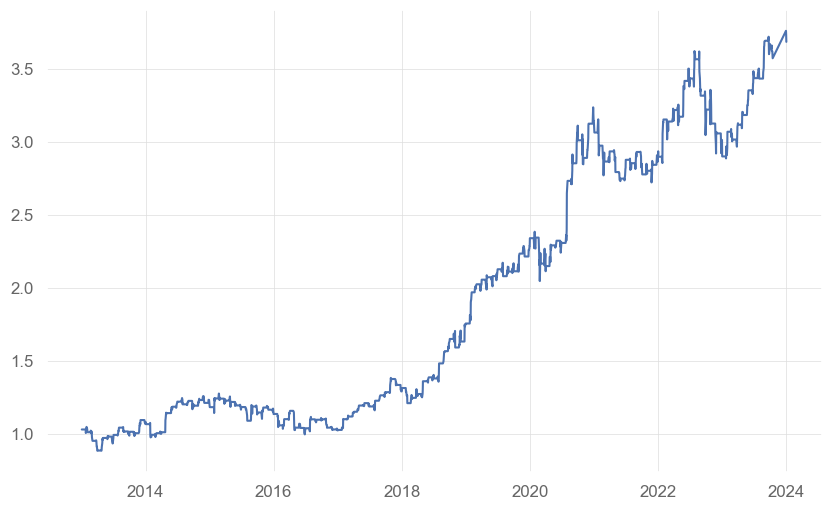

In [595]:
tom.calculate_trading_days(zyxi)
equity_curve = tom.calculate(zyxi)
plt.plot(zyxi['Cumulative Returns'])


In [596]:
zyxi

,Date,Open,Close,High,Low,trading_days_in_month,constant,trading_day_of_month,trading_days_til_month_end,Signal,Daily Returns,Cumulative Returns,Benchmark
Date,,,,,,,,,,,,,
2013-01-01,2013-01-01,19.006,19.006,19.006,19.006,23,1,1,22,1,NaN,NaN,100.000000
2013-01-02,2013-01-02,19.779,19.608,19.821,19.344,23,1,2,21,1,0.031674,1.031674,103.167421
2013-01-03,2013-01-03,19.556,19.361,19.631,19.321,23,1,3,20,0,-0.000000,1.031674,101.867831
2013-01-04,2013-01-04,19.178,18.821,19.237,18.780,23,1,4,19,0,-0.000000,1.031674,99.026623
2013-01-07,2013-01-07,18.644,18.711,18.904,18.400,23,1,5,18,0,-0.000000,1.031674,98.447859
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-17,2023-10-17,176.650,177.150,178.420,174.800,13,1,12,1,1,-0.008785,3.588405,932.074082
2023-10-18,2023-10-18,175.580,176.360,177.570,175.420,13,1,13,0,1,-0.004459,3.572403,927.917500
2024-01-02,2024-01-02,187.150,185.640,188.440,183.885,3,1,1,2,1,0.052620,3.760381,976.744186


In [597]:
print("cagr",qs.stats.cagr(zyxi['Cumulative Returns'])) # cagr
print("exposure", qs.stats.exposure(zyxi['Cumulative Returns'])) # time in market

cagr 0.08307315519224145
exposure 0.31


cagr 0.04844795500959842
exposure 0.34


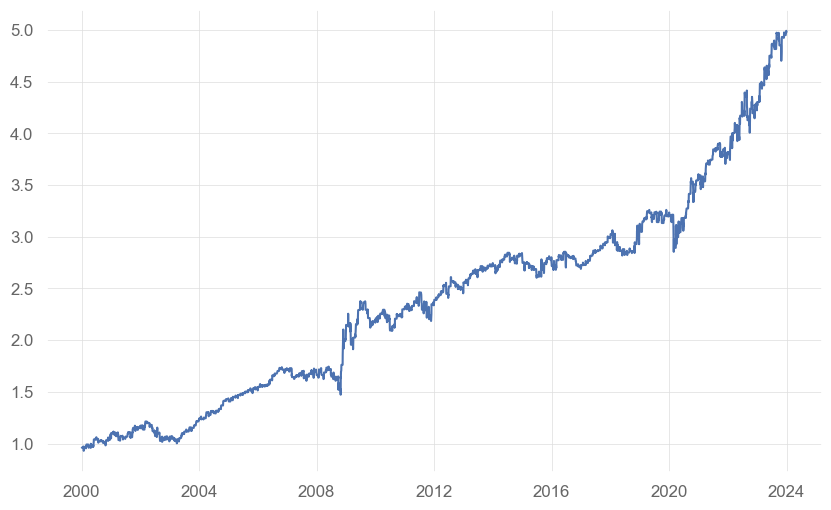

In [668]:

security_name = 'SPY'
#start_date = '2020-01-01'
start_date = '2000-01-01'
end_date = '2024-01-01'

mystrategy = l.TurnOfMonthStrategy(security_name, start_date, end_date)
result = mystrategy.run()
print("cagr",qs.stats.cagr(mystrategy.result['Cumulative Returns'])) # cagr
print("exposure", qs.stats.exposure(mystrategy.result['Cumulative Returns'])) # time in market

In [669]:
mystrategy.result

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,trading_days_in_month,constant,trading_day_of_month,trading_days_til_month_end,Signal,Daily Returns,Cumulative Returns,Benchmark
Date,,,,,,,,,,,,,,,,
2000-01-03 00:00:00-05:00,95.697466,95.697466,92.873342,93.881958,8164300,0.0,0.0,0.0,20,1,1,19,1,NaN,NaN,100.000000
2000-01-04 00:00:00-05:00,92.651405,92.994334,90.139953,90.210556,8089800,0.0,0.0,0.0,20,1,2,18,1,-0.039107,0.960893,96.089342
2000-01-05 00:00:00-05:00,90.331604,91.360391,88.596785,90.371948,12177900,0.0,0.0,0.0,20,1,3,17,0,0.000000,0.960893,96.261252
2000-01-06 00:00:00-05:00,90.129879,91.340218,88.919540,88.919540,6227200,0.0,0.0,0.0,20,1,4,16,0,-0.000000,0.960893,94.714195
2000-01-07 00:00:00-05:00,90.573660,94.083641,90.412281,94.083641,8066500,0.0,0.0,0.0,20,1,5,15,0,0.000000,0.960893,100.214826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,473.859985,475.380005,471.700012,473.649994,67126600,0.0,0.0,0.0,20,1,16,4,1,0.002010,4.960048,504.516527
2023-12-26 00:00:00-05:00,474.070007,476.579987,473.989990,475.649994,55387000,0.0,0.0,0.0,20,1,17,3,1,0.004223,4.980992,506.646862
2023-12-27 00:00:00-05:00,475.440002,476.660004,474.890015,476.510010,68000300,0.0,0.0,0.0,20,1,18,2,1,0.001808,4.989998,507.562923


In [670]:
from IPython.core.display import display, HTML

def force_show_all(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None):
        display(HTML(df.to_html()))

# ... now when you're ready to fully display df:
#force_show_all(df)

/var/folders/ht/4gz2x46d0hz9qprz3nbv3p900000gn/T/ipykernel_50680/1725291643.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [700]:
#result = mystrategy.download_data()

def month_chart(ticker='SPY'):
    result = yf.download(ticker)
    result['Year'] = result.index.year
    result['Month'] = result.index.month
    result['Day'] = result.index.day


    #mean = result.groupby(['Month','Day']).mean()
    #force_show_all(mean)
    #result
    result['Daily Returns'] = result['Close'].pct_change()# * data['Signal'].shift(1)
    mean = result.groupby(['Day']).mean()
    #force_show_all(mean)
    mean['Daily Returns'].plot.bar()
    plt.show()

    (mean['Daily Returns'] > 0).plot.bar()
    plt.show()



[*********************100%%**********************]  1 of 1 completed


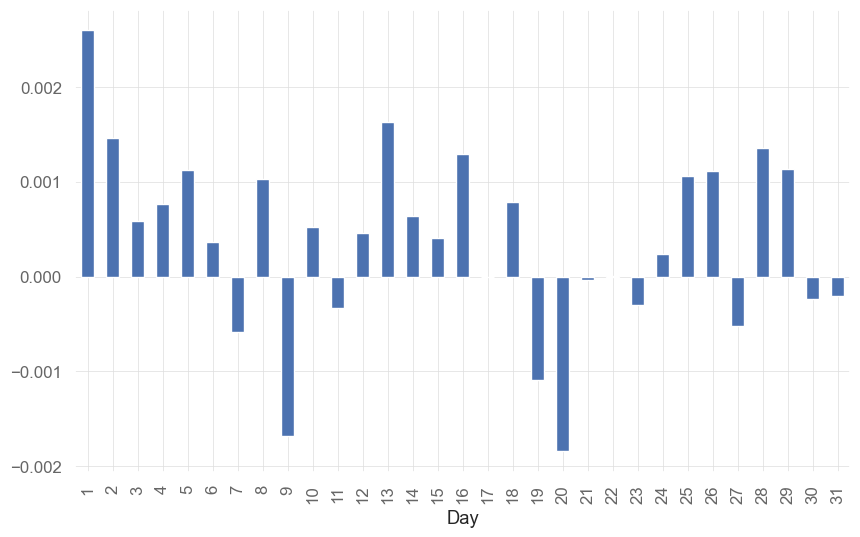

TypeError: no numeric data to plot

In [701]:
month_chart('SPY')

[*********************100%%**********************]  1 of 1 completed


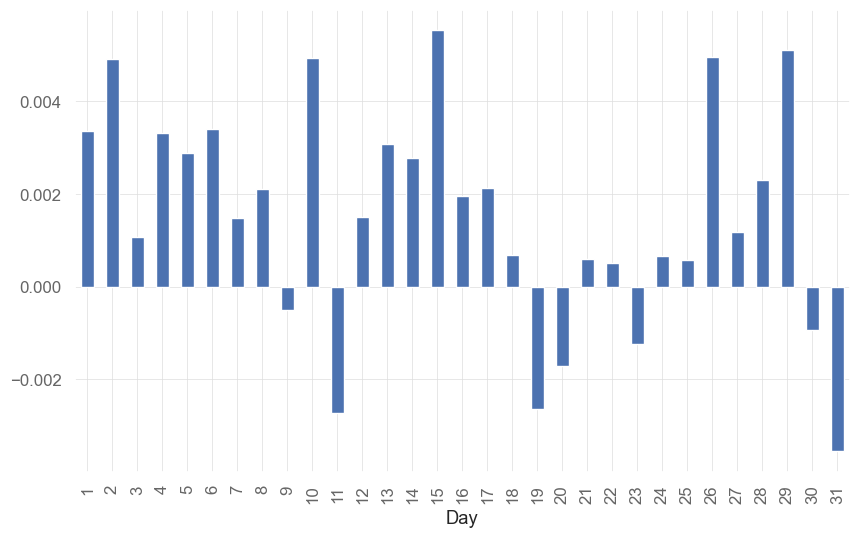

In [688]:
month_chart('UPRO')

[*********************100%%**********************]  1 of 1 completed


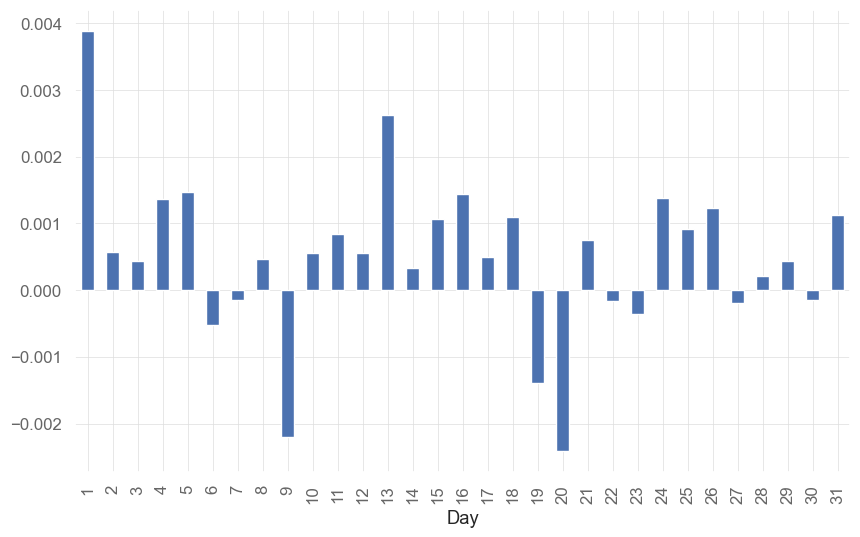

In [689]:
month_chart('QQQ') # nasdaq

[*********************100%%**********************]  1 of 1 completed


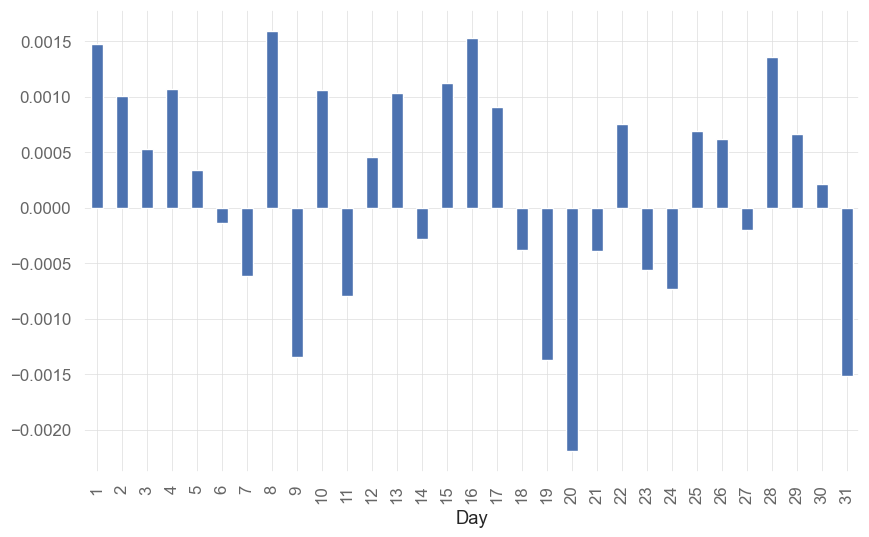

In [690]:
month_chart('XLP') # CONSUMER STAPLES

[*********************100%%**********************]  1 of 1 completed


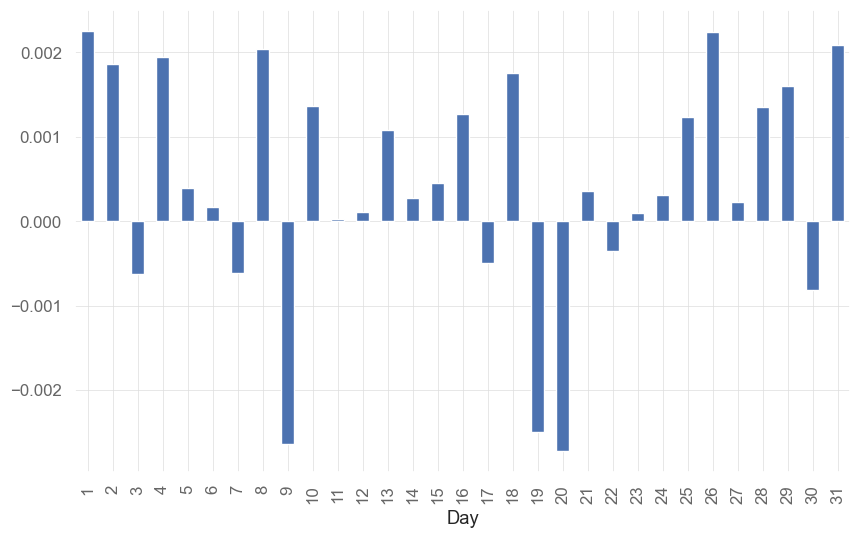

In [691]:
month_chart('XLY') # CONSUMER DISCRETIONARY

[*********************100%%**********************]  1 of 1 completed


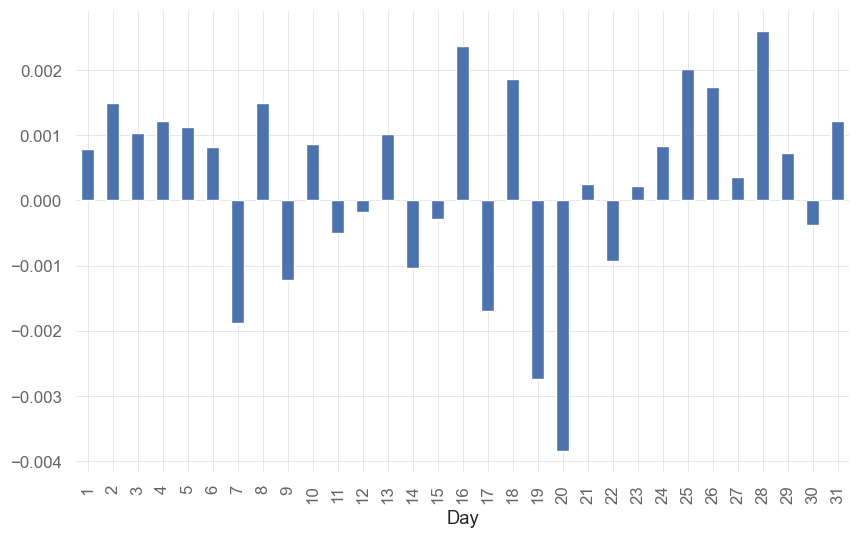

In [692]:
month_chart('XLF') # FINANCIALS

[*********************100%%**********************]  1 of 1 completed


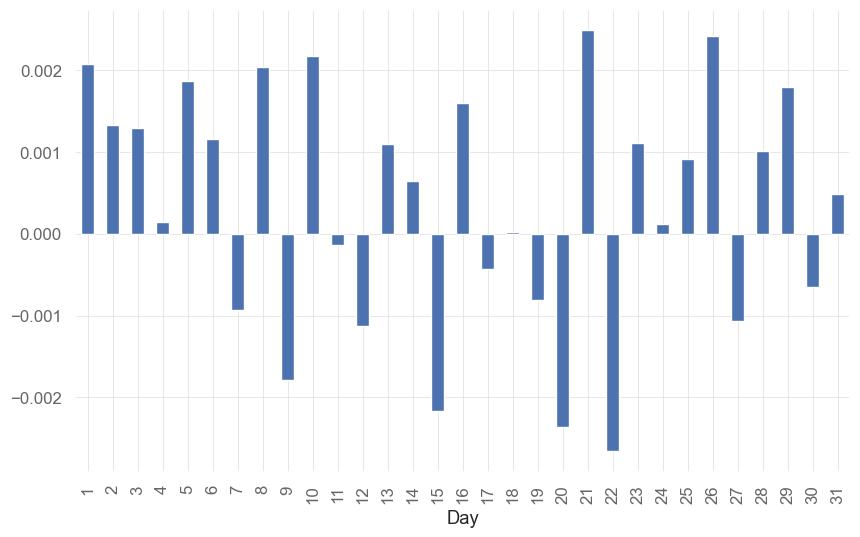

In [693]:
month_chart('XLE') # ENERGY

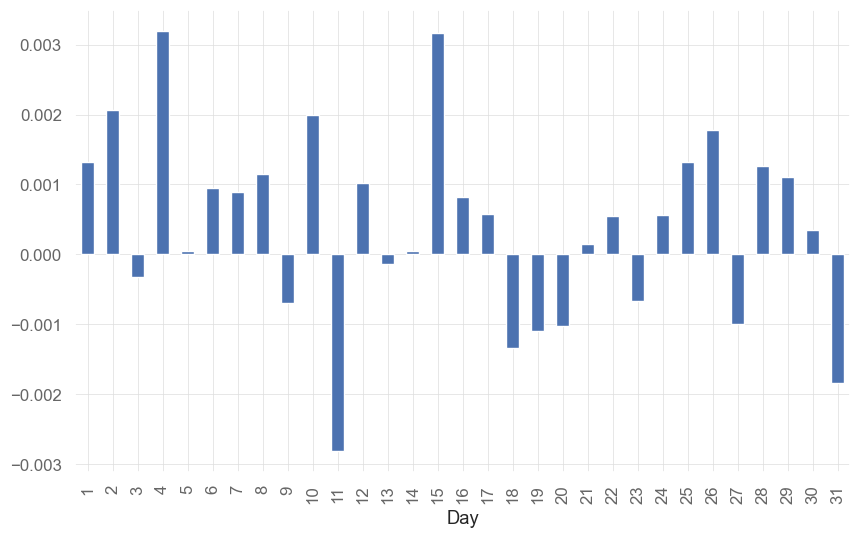

TypeError: no numeric data to plot

In [728]:
ticker='SPY'
start_date = '2015-01-01'
end_date = '2023-01-01'

result = yf.Ticker(ticker).history(interval='1d', start=start_date, end=end_date)
#result = yf.download(ticker)
result['Year'] = result.index.year
result['Month'] = result.index.month
result['Day'] = result.index.day


#mean = result.groupby(['Month','Day']).mean()
#force_show_all(mean)
#result
result['Daily Returns'] = result['Close'].pct_change()# * data['Signal'].shift(1)
mean = result.groupby(['Day']).mean()
#force_show_all(mean)
mean['Daily Returns'].plot.bar()
plt.show()

(mean['Daily Returns'] > 0).plot.bar()
plt.show()


In [725]:
def subtract_two(x):
    return [(x['Daily Returns'] > 0).sum(),(x['Daily Returns'] > -10).sum(),(x['Daily Returns'] > 0).sum()/(x['Daily Returns'] > -10).sum()]

#mean['Daily Returns'].transform(subtract_two)
#mean
mean = result.groupby(['Day']).apply(subtract_two)

In [726]:
mean

Day
1      [156, 241, 0.6473029045643154]
2      [151, 253, 0.5968379446640316]
3      [139, 257, 0.5408560311284046]
4      [128, 238, 0.5378151260504201]
5      [142, 253, 0.5612648221343873]
6      [135, 258, 0.5232558139534884]
7      [126, 261, 0.4827586206896552]
8      [143, 267, 0.5355805243445693]
9      [127, 264, 0.4810606060606061]
10     [154, 263, 0.5855513307984791]
11     [146, 263, 0.5551330798479087]
12     [152, 264, 0.5757575757575758]
13       [147, 263, 0.55893536121673]
14     [148, 262, 0.5648854961832062]
15     [137, 257, 0.5330739299610895]
16      [145, 258, 0.562015503875969]
17     [130, 258, 0.5038759689922481]
18     [142, 255, 0.5568627450980392]
19     [119, 255, 0.4666666666666667]
20             [121, 256, 0.47265625]
21    [124, 255, 0.48627450980392156]
22     [139, 262, 0.5305343511450382]
23     [128, 261, 0.4904214559386973]
24     [138, 255, 0.5411764705882353]
25     [132, 232, 0.5689655172413793]
26     [139, 251, 0.5537848605577689]
27      

In [727]:
result

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Daily Returns
Date,,,,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,24.840681,1003200,1993,1,29,NaN
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.017349,480500,1993,2,1,0.007112
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.070368,201300,1993,2,2,0.002119
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.335381,529400,1993,2,3,0.010571
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.441389,531500,1993,2,4,0.004184
...,...,...,...,...,...,...,...,...,...,...
2024-01-17,471.820007,472.790009,469.869995,472.290009,472.290009,68843900,2024,1,17,-0.005559
2024-01-18,474.010010,477.059998,472.420013,476.489990,476.489990,91856200,2024,1,18,0.008893
2024-01-19,477.649994,482.720001,476.540009,482.429993,482.429993,110733300,2024,1,19,0.012466


In [753]:
import pandas as pd
# create dataframe
df = pd.DataFrame({'PageViews': [100, 120, 180, 200, 240, 160, 130],
                   'Revenue': [10, 15, 12, 20, 30, 22, 14]},
                  index = ['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',\
                           '2020-03-05', '2020-03-06', '2020-03-07'])
# print the dataframe
print(df)

            PageViews  Revenue
2020-03-01        100       10
2020-03-02        120       15
2020-03-03        180       12
2020-03-04        200       20
2020-03-05        240       30
2020-03-06        160       22
2020-03-07        130       14


In [770]:
rolling_window_size = 2
df['PageViews'].rolling(rolling_window_size).sum().shift(-(rolling_window_size-1))


2020-03-01    220.0
2020-03-02    300.0
2020-03-03    380.0
2020-03-04    440.0
2020-03-05    400.0
2020-03-06    290.0
2020-03-07      NaN
Name: PageViews, dtype: float64